<h1><center>Práctica Aprendizaje: Airbnb.</center></h1>

<h1><center>Análisis Exploratorio de los datos</center></h1>

# Introducción

- Conjunto de datos: El conjunto de datos escogido es éste, extraído de Airbnb mediante técnicas de scraping. Dentro de las opciones recomiendo utilizar el extract (“Only the 14780 selected records”), ya que minimiza el tiempo de ejecución y evita problemas de memoria en equipos con menos prestaciones. airbnb-listing-extract.csv
- Se busca crear un evaluador automático de precios a partir de las carácterísticas de los alojamientos. 

# 0. Librerías

In [1]:
# Paquetes y librerias
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt  

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Análisis exploratorio de los datos

## Selección de variables

Vamos a comenzar con una exploración previa de los datos por si fuera necesario realizar cambios o transformaciones en los mismos.

En primer lugar, cargamos los datos y miramos la dimensión y la estructura.

In [3]:
# Cargamos los datos
df = pd.read_csv("airbnb-listings-cleaned.csv")
df.head(5)

,id,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10080,none,30899,Rami,2009-08-10,"Vancouver, British Columbia, Canada",within a few hours,85%,NaN,f,...,f,f,strict_14_with_grace_period,f,f,31,31,0,0,0.18
1,11400,none,42305,Jaynne,2009-09-30,"Vancouver, British Columbia, Canada",NaN,NaN,NaN,f,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,0.64
2,13188,none,51466,Family Guns,2009-11-04,"Vancouver, British Columbia, Canada",within an hour,100%,NaN,t,...,t,f,moderate,f,f,1,1,0,0,1.51
3,13357,none,52118,Liliana,2009-11-07,"Vancouver, British Columbia, Canada",within an hour,100%,NaN,f,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.51
4,13358,none,52116,Lynn,2009-11-07,"Vancouver, British Columbia, Canada",NaN,NaN,NaN,f,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.65


In [4]:
# Dimension de los datos
df.shape

(4837, 82)

Tenemos 4837 registros de 82 variables.

**Nota:** Agregar un README en github con descripción de las variables del dataframe y poner enlace

Vemos el tipo de las variables y si existen valores nulos.

In [5]:
# Tipo de las variables y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4837 entries, 0 to 4836
Data columns (total 82 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4837 non-null   int64  
 1   experiences_offered                           4837 non-null   object 
 2   host_id                                       4837 non-null   int64  
 3   host_name                                     4836 non-null   object 
 4   host_since                                    4836 non-null   object 
 5   host_location                                 4830 non-null   object 
 6   host_response_time                            2731 non-null   object 
 7   host_response_rate                            2731 non-null   object 
 8   host_acceptance_rate                          0 non-null      float64
 9   host_is_superhost                             4836 non-null   o

**Variables**

Variables que consideramos para el estudio cualitativo del host
- host_id
- host_since
- host_is_superhost
- host_verified

Selección de variables para el modelo:
- latitude
- longitude
- room_type: tipo de habitación (privada o apartamento)
- accommodates: número de huéspedes
- bathrooms: número de baños
- bedrooms: número de habitaciones
- beds: número de camas
- security_deposit: depósito de seguro
- celaning_fee: 
- guests_inclueded
- extra_people
- minimum_nights
- maximum_nights
- availability_90
- number_of_reviews
- review_scores_rating 
- review_scores_accuracy                  
- review_scores_cleanliness                   
- review_scores_checkin                  
- review_scores_communication        
- review_scores_location         
- review_scores_value 
- reviews_per_month
- **price**: Esta es la variable target

In [6]:
cols = [1,3,5,6,7,8,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,29,35,36,38,39,46,47,48,49,50,51,52,53,55,56,57,58,
        60,61,62,70,71,72,73,74,75,76,77,78,79,80,81]

# Eliminamos las variables
df = df.drop(df.columns[cols],axis = 1)
df.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [7]:
# Comprobamos que el indice es valido
df['id'].isnull().sum()
df['id'].duplicated().sum()

# Cambiamos el indice
df = df.set_index('id')

In [8]:
df.head(5)

,host_id,host_since,host_is_superhost,host_identity_verified,latitude,longitude,is_location_exact,room_type,accommodates,bathrooms,...,maximum_nights,availability_30,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
id,,,,,,,,,,,,,,,,,,,,,
10080,30899,2009-08-10,f,t,49.287716,-123.121103,t,Entire home/apt,6,2.0,...,1124,0,16,93.0,9.0,9.0,10.0,9.0,10.0,9.0
11400,42305,2009-09-30,f,t,49.253756,-123.112659,t,Private room,1,1.0,...,364,30,70,92.0,9.0,10.0,10.0,10.0,10.0,9.0
13188,51466,2009-11-04,t,t,49.245770,-123.105158,t,Entire home/apt,4,1.0,...,1125,23,165,96.0,10.0,10.0,10.0,10.0,10.0,10.0
13357,52118,2009-11-07,f,t,49.279548,-123.105457,t,Entire home/apt,4,2.0,...,30,27,56,84.0,8.0,9.0,8.0,8.0,8.0,8.0
13358,52116,2009-11-07,f,f,49.282090,-123.125150,t,Entire home/apt,2,1.0,...,60,5,384,94.0,10.0,10.0,10.0,10.0,10.0,9.0


Realizamos algunas modificaciones sobre las varibles:

In [9]:
# Nos quedamos solo con el año de host_since 
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
df['host_since'] = df['host_since'].dt.year
df['host_for'] = 2019 - df['host_since'].values
df.drop(['host_since'], axis = 1, inplace = True)

In [10]:
# Pasamos is host_is_superhost y host_identity_verified a binario 1:t 0:f
df['host_is_superhost'] = np.where(df['host_is_superhost'] == "t", 1,0)
df['host_identity_verified'] = np.where(df['host_identity_verified'] == "t", 1,0)

In [11]:
# Si la localizacion no esta verificada ponemos NaN
df.loc[df['is_location_exact'] != 't', ['latitude', 'longitude']] = np.nan
df = df.dropna(subset=['latitude', 'longitude'])
df.drop(['is_location_exact'], axis = 1, inplace = True)

In [12]:
# Cambiamos la variable room_type a dummies segun las 3 categorias
df['room_type'].value_counts()
df_rooms = pd.get_dummies(df[['room_type']], prefix = "", prefix_sep = "")
df = pd.concat([df,df_rooms], axis=1)
df.drop(['room_type'], axis = 1, inplace = True)

In [13]:
# Cambiamos extra_people a dtype=float64
df['extra_people'] = df['extra_people'].str.replace('$','').astype('float64')

In [14]:
df.head()

,host_id,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_for,Entire home/apt,Private room,Shared room
id,,,,,,,,,,,,,,,,,,,,,
10080,30899,0,1,49.287716,-123.121103,6,2.0,2.0,4.0,295.0,...,9.0,9.0,10.0,9.0,10.0,9.0,10.0,1,0,0
11400,42305,0,1,49.253756,-123.112659,1,1.0,1.0,1.0,60.0,...,9.0,10.0,10.0,10.0,10.0,9.0,10.0,0,1,0
13188,51466,1,1,49.245770,-123.105158,4,1.0,0.0,2.0,119.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,0
13357,52118,0,1,49.279548,-123.105457,4,2.0,2.0,2.0,151.0,...,8.0,9.0,8.0,8.0,8.0,8.0,10.0,1,0,0
13358,52116,0,0,49.282090,-123.125150,2,1.0,1.0,1.0,119.0,...,10.0,10.0,10.0,10.0,10.0,9.0,10.0,1,0,0


## Análisis descriptivo

Vemos algunos estadísticos de los datos y estudiamos la distribución de las variables.

In [15]:
# Estadisticos descriptivos
df.drop(columns=['host_id', 'latitude', 'longitude']).iloc[:,0:13].describe()

,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights
count,4013.000000,4013.000000,4013.000000,4013.000000,4011.000000,4010.000000,4013.000000,3416.000000,3681.000000,4013.000000,4013.000000,4013.000000,4013.000000
mean,0.353352,0.392724,3.563170,1.330551,1.487410,1.891272,165.240718,375.312646,81.350992,1.920010,15.888612,13.163967,686.478445
std,0.478070,0.488417,2.382285,0.681213,1.087691,1.293208,205.623429,516.012915,61.807099,1.567151,26.329216,33.165384,1690.439572
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,80.000000,0.000000,39.000000,1.000000,0.000000,2.000000,48.000000
50%,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,119.000000,250.000000,70.000000,1.000000,10.000000,2.000000,1124.000000
75%,1.000000,1.000000,4.000000,1.500000,2.000000,2.000000,198.000000,500.000000,100.000000,2.000000,25.000000,30.000000,1125.000000
max,1.000000,1.000000,16.000000,8.000000,30.000000,25.000000,6500.000000,6561.000000,500.000000,16.000000,396.000000,998.000000,99999.000000


In [16]:
# Estadisticos descriptivos
df.drop(columns=['host_id', 'latitude', 'longitude']).iloc[:,13:].describe()

,availability_30,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_for,Entire home/apt,Private room,Shared room
count,4013.000000,4013.000000,3439.000000,3438.000000,3439.000000,3437.000000,3437.000000,3437.000000,3437.000000,4012.000000,4013.000000,4013.000000,4013.000000
mean,11.569150,33.782208,94.628962,9.705352,9.523699,9.791097,9.808845,9.673262,9.425080,4.053589,0.712185,0.279342,0.008472
std,11.186759,51.558086,6.867366,0.687077,0.839648,0.553854,0.576866,0.600270,0.785854,2.384164,0.452801,0.448732,0.091667
min,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,2.000000,0.000000,0.000000,0.000000
50%,8.000000,14.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,1.000000,0.000000,0.000000
75%,22.000000,43.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,1.000000,1.000000,0.000000
max,30.000000,544.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000


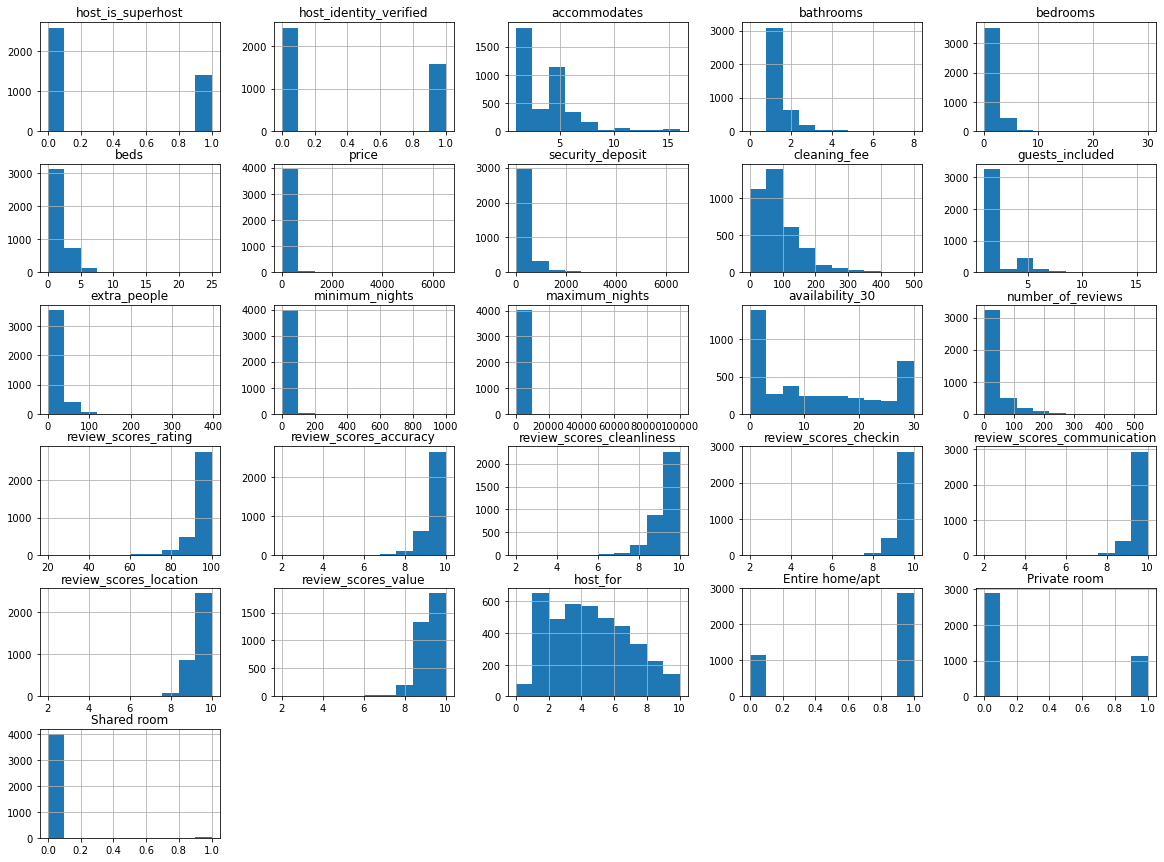

In [17]:
# Histograma de las variables
df.drop(columns=['host_id', 'latitude', 'longitude']).hist(figsize=(20,15))
plt.show()

## Imputación de missings

In [18]:
# Valores missing
df.isnull().sum()

host_id                          0
host_is_superhost                0
host_identity_verified           0
latitude                         0
longitude                        0
accommodates                     0
bathrooms                        0
bedrooms                         2
beds                             3
price                            0
security_deposit               597
cleaning_fee                   332
guests_included                  0
extra_people                     0
minimum_nights                   0
maximum_nights                   0
availability_30                  0
number_of_reviews                0
review_scores_rating           574
review_scores_accuracy         575
review_scores_cleanliness      574
review_scores_checkin          576
review_scores_communication    576
review_scores_location         576
review_scores_value            576
host_for                         1
Entire home/apt                  0
Private room                     0
Shared room         

In [19]:
# Librerias
from sklearn.linear_model import LinearRegression

In [20]:
# Separamos las variables
target1 = 'bedrooms'
features = ['accommodates', 'bathrooms']

# Creating a copy of the DataFrame with only the selected features and the target variable
df_selected1 = df[[target1] + features].copy()

# Splitting the data into two subsets: one with missing values and one without
df_missing = df_selected1[df_selected1.isnull().any(axis=1)]
df_not_missing = df_selected1.dropna()

# Imputacion de bedrooms
# Linear regression imputation
regression_model = LinearRegression()

# Training the model using non-missing data
regression_model.fit(df_not_missing[features], df_not_missing[target1])

missing_predictions1 = regression_model.predict(df_missing[features])

# Imputing missing values with the predicted values
df_selected1.loc[df_selected1[target1].isnull(), target1]= missing_predictions1

In [22]:
# Separamos las variables
target2 = 'beds'
features = ['accommodates', 'bathrooms']

# Creating a copy of the DataFrame with only the selected features and the target variable
df_selected2 = df[[target2] + features].copy()

# Splitting the data into two subsets: one with missing values and one without
df_missing = df_selected2[df_selected2.isnull().any(axis=1)]
df_not_missing = df_selected2.dropna()

# Imputacion de beds
# Linear regression imputation
regression_model = LinearRegression()

# Training the model using non-missing data
regression_model.fit(df_not_missing[features], df_not_missing[target2])

missing_predictions2 = regression_model.predict(df_missing[features])

# Imputing missing values with the predicted values
df_selected2.loc[df_selected2[target2].isnull(), target2] = missing_predictions2

In [23]:
df['bedrooms'] = df_selected1['bedrooms']
df['beds'] = df_selected2['beds']

## Outliers

Primero vamos a estudiar los outliers en las variables *bedrooms* y *bathrooms*

In [ ]:
# Boxplot bedrooms y bathrooms
fig = plt.figure(figsize = (5,5))

plt.boxplot(df[['bedrooms','bathrooms']])

plt.title('Outliers')
plt.xticks([1,2], ['Bedrooms', 'Bathrooms'])

plt.show()

Estudiamos los outliers en conjunto. Para ello empleamos la librería *PyOD* que posee estrategias para detectar outliers. En este caso, empleamos el algoritmo de KNN

In [ ]:
#!pip install pyod --user

In [ ]:
# Librerias
from pyod.models.knn import KNN

In [ ]:
# Deteccion de outliers
A = df[['bedrooms','bathrooms','sqft_living']]
clf = KNN(contamination=0.1)
clf.fit(A)
y_pred = clf.predict(A)
A[y_pred == 1]

Así, eliminamos los outliers del dataframe original

In [ ]:
# Sin outliers
non_outliers = A[y_pred ==0]
df = df.loc[non_outliers.index]

# Dimension del dataframe sin outliers
df.shape

Como habíamos comentado antes, las variables como *price*, *sqft_living* y *sqft_lot* presentan mucha asimetría. Por ello, realizamos una transformación logarítmica.

Además, vamos a estudiar si las variables *sqft_living* y *sqft_living15* son parecidas (y lo mismo con *sqft_lot* y *sqft_lot15*), en cuyo caso eliminaremos las dos últimas.

In [ ]:
# sqft_living y sqft_living15
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.kdeplot(df['sqft_living'], shade=True, color='blue', label='sqft_living', ax=ax)
sns.kdeplot(df['sqft_living15'], shade=True, color='red', label='sqft_living15', ax=ax)

ax.set_xlabel('Square footage')
ax.set_ylabel('Densidad')
ax.set_title('Comparacion sqft_living & sqft_living15')
ax.legend(loc='best')

plt.show()

In [ ]:
# sqft_lot y sqft_lot15
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.kdeplot(df['sqft_lot'], shade=True, color='blue', label='sqft_living', ax=ax)
sns.kdeplot(df['sqft_lot15'], shade=True, color='red', label='sqft_living15', ax=ax)

ax.set_xlabel('Square footage')
ax.set_ylabel('Densidad')
ax.set_title('Comparacion sqft_lot & sqft_lot15')
ax.legend(loc='best')

plt.show()

Como se distribuyen de la misma manera y nos aportaran la misma infromación, sólo utilizaremos las variables referentes a la casa. 

Procedemos a realizar la transformación logarítmica para obtener simetría.

In [ ]:
# Transfomacion
cols = ['price','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
for col in cols:
    df[col] = np.log(df[col])

In [ ]:
# Histograma de las variables transformadas
fig, axs = plt.subplots(1, 5, figsize=(10, 5))

axs[0].hist(df['price'], bins=30, alpha= 0.5,color='red')
axs[1].hist(df['sqft_living'], bins=30, alpha=0.5, color='blue')
axs[2].hist(df['sqft_lot'], bins=30, alpha=0.5, color='green')
axs[3].hist(df['sqft_above'], bins=30, alpha=0.5, color='purple')
axs[4].hist(df['sqft_above'], bins=30, alpha=0.5, color='yellow')

axs[0].set_title('Log-Price')
axs[1].set_title('Log-Sqft_living')
axs[2].set_title('Log-Sqft_lot')
axs[3].set_title('Log-Sqft_above')
axs[4].set_title('Log-Sqft_basement')

plt.show()

Mediante los histogramas podemos observar que las variables presentan asimetría, lo cual no es favorable para los modelos de regresión. Podemos estudiar esto mediante el coeficiente de asimetria de Fisher, que mida la centralidad de los datos. Si el coeficiente es 0, los datos están centrados entrorno a la media, si es postivo presentan asimetría por la derecha, y si es negativo asimetría por la izquierda.

In [ ]:
# Simetria
df.skew(axis=0, skipna = True) # Solo nos interesa para variables continuas 

## Algunos gráficos interesantes

Ahora vamos a estudiar algunas relaciones existentes entre las variables y *price*

En primer lugar, podemos ver cómo influye el número de habitaciones y baños en el precio de la casa mediante un boxplot.

In [ ]:
# Boxplot entre bedrooms y log-price
fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(x=df['bedrooms'], y=df['price'], data = df, ax = ax)

plt.xlabel('Bedrooms')
plt.ylabel('log Price')
plt.title('Boxplot bedrooms vs price')

plt.show()

In [ ]:
# Boxplot entre bathrooms y logprice
fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(x=df['bathrooms'], y=df['price'], data = df, ax = ax)

plt.xlabel('Bathrooms')
plt.ylabel('log Price')
plt.title('Boxplot bathrooms vs price')

plt.show()

También podemos ver como aumenta el precio a medida que aumenta la superficie habitable de la casa.

In [ ]:
# Grafico de dispersion sqft_living vs. price
fig,ax = plt.subplots(figsize=(10,5))

ax.scatter(x=df['sqft_living'].values, y = df['price'].values)

ax.set_xlabel('Sqft Living')
ax.set_ylabel('log Price')
plt.title('Sqft vs Price')

plt.show()

Además, también puede ser interesante estudiar si existe alguna relación entre las componentes de geolocalización y el precio de las casas.

Podemos comenzar estudiando las variables longitud y latitud de la casa por separado.

In [ ]:
# Grafico de dispersion long /lat vs. price
fig,ax = plt.subplots(2, figsize=(10,5))

ax[0].scatter(x=df['long'].values, y = df['price'].values)
ax[1].scatter(x=df['lat'].values, y = df['price'].values)

ax[0].set_xlabel('Long')
ax[0].set_ylabel('log Price')
ax[1].set_xlabel('Lat')
ax[1].set_ylabel('log Price')

plt.suptitle('Long / Lat vs Price')

plt.show()

También, podemos tratar la latitud y longitud conjutamente creando puntos en el espacio.

In [ ]:
# !pip install geopandas

In [ ]:
# Librerias
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
# Mapa de King County, Washington
street_map = gpd.read_file('./Incorporated_Areas_of_King_County/Incorporated_Areas_of_King_County___citydst_area.shp')
# Creamos GeoPandas Data Frame
# Sistema de coordenadas 
crs = {'init':'epsg:4326'}
# Puntos de coordenadas
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
# DataFrame geoPandas
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry = geometry)

In [ ]:
# Grafico de long/lat vs price
fig,ax = plt.subplots(figsize=(10,10))

street_map.plot(ax=ax, alpha=0.4,color='grey') 
geo_df.plot(column='price',ax=ax, alpha=1,legend=True,markersize=10)

plt.title('Precio de las viviendas en WA', fontsize=15)
plt.xlim(-122.6,-121.0)
plt.ylim(47.1,47.8)

plt.show()

Podemos observar que las viviendas situadas al norte tienen un mayor precio.

## Análisis de correlaciones

Para finalizar, estudiamos las correlaciones entre las variables. Así, podemos decidir qué variables usar para el modelo y estudiar posibles relaciones existentes entre ellas.

In [ ]:
plt.figure(figsize=(20,10))
correlaciones= df.corr()
sns.heatmap(correlaciones,cmap="GnBu",annot=True) 
correlaciones

Así, seleccionamos las siguientes variables para el modelo:
Las variables de modelización:
* _bedrooms_ 
* _bathrooms_ 
* _sqft_living_
* _sqft_lot_
* _view_
* _condition_
* _grade_
* _lat_
* _long_

Además, podemos considerar crear dos variables. Por un lado, *bed&bath*, que incluya en una única variable el número de baños y habitaciones de la casa (pues tienen una alta correlación). Por otro lado, podría ser más interesante trabajar con una variable que definimos como *total_yrs* = *current_year* (2023) - *yr_built*

Y la varibale de etiqueta:
* _logPrice_

Así, nos queda el siguiente DataFrame

In [ ]:
# Creamos las nuevas variables
bed_and_bath = df['bedrooms'] + df['bathrooms']
total_yrs = 2023 - df['yr_built']

In [ ]:
# DataFrame final 
df = df.drop(columns=['date','bedrooms','bathrooms','floors','waterfront','grade','sqft_above','sqft_basement','yr_built','zipcode','sqft_living15','sqft_lot15','geometry'], axis = 1)
df['bed_and_bath'] = bed_and_bath
df['total_yrs'] = total_yrs
df.head()

# 2. División de los datos

In [ ]:
# Paquetes y liberias
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

En primer lugar, creamos la matriz de observaciones y el vector etiqueta con los que trabajaremos para ajustar el modelo de regresión lineal.

In [ ]:
# Vector etiqueta
y = df['price']

# Matriz de observaciones
X = df.drop('price',axis=1)

In [ ]:
# Variables dummy para view y condition (son categoricas)
X = pd.get_dummies(X, columns=['view', 'condition'], drop_first=True)

In [ ]:
# Estandarizamos los datos
objeto = StandardScaler()
X_ss = pd.DataFrame(objeto.fit_transform(X.iloc[:,0:6]), columns=list(X.iloc[:,0:6].columns))
# Concatenamos los datos
X = pd.concat([X_ss, X.loc[:,'view_1':'condition_5'].reset_index()], axis=1)
X.head(5)

Para ajustar los distintos modelos tenemos 2 opciones:
1. Plantear un problema de regresión donde la variable *y* es de tipo continuo
2. Plantear un problema de clasificación donde agrupamos en diferentes cluster los valores de la variable *y*

In [ ]:
# Realizamos un describe para saber como separar los datos
y.describe()

In [ ]:
# Problema de clasificacion
y_clas = pd.qcut(y, 3, labels=False)

# Hallamos los rangos de valores para las diferentes categorias
quantiles = pd.qcut(y, 3).unique().sort_values()
print(quantiles)

Donde las clases serían:
$0:\text{Barato} \in (11.224, 12.78]$;
$1:\text{Medio} \in (12.78, 13.218]$;
$2:\text{Caro} \in (13.218, 14.897]$

Separamos los datos en train y test

In [ ]:
X_train, X_test, y_train, y_test, y_train_clas, y_test_clas = train_test_split(X, y, y_clas, test_size=0.3, random_state=0)

In [ ]:
# Librerias
import os

# Carpeta con datos
if not os.path.exists('Datos'):
    os.makedirs('Datos')
    
# Guardamos los datos
X_train.to_csv('Datos/X_train.csv', index=False)
X_test.to_csv('Datos/X_test.csv', index=False)
y_train.to_csv('Datos/y_train.csv', index=False)
y_test.to_csv('Datos/y_test.csv', index=False)
y_train_clas.to_csv('Datos/y_train_clas.csv', index=False)
y_test_clas.to_csv('Datos/y_test_clas.csv', index=False)